<a href="https://colab.research.google.com/github/shemi024/regression-correlation/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/DataPreprocessing.csv')

In [ ]:
data.shape

(10, 4)

In [ ]:
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [ ]:
#check number of 0 and 1 in the output
data['Online Shopper'].value_counts(normalize=True)

No     0.5
Yes    0.5
Name: Online Shopper, dtype: float64

In [ ]:
data.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [ ]:
for i in ['Age','Income']:
          data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [ ]:
data.Region.nunique()

3

In [ ]:
data.drop('Region',axis=1,inplace=True)

In [ ]:
#one hot encoding 
#we have a categorical colum "gender",so we want to change in to numeric
data=pd.get_dummies(data)

In [ ]:
data.head

<bound method NDFrame.head of     Age   Income  Online Shopper_No  Online Shopper_Yes
0  49.0  86400.0                  1                   0
1  32.0  57600.0                  0                   1
2  35.0  64800.0                  1                   0
3  43.0  73200.0                  1                   0
4  45.0  73200.0                  0                   1
5  40.0  69600.0                  0                   1
6  43.0  62400.0                  1                   0
7  53.0  94800.0                  0                   1
8  55.0  99600.0                  1                   0
9  42.0  80400.0                  0                   1>

In [ ]:
#spliting the dataset
x=data.drop(['Age','Online Shopper_No'],axis=1)
y=data['Online Shopper_No']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=42, test_size=0.2)

In [ ]:
x_train.shape

(8, 2)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train, y_train)
y_pred = logis_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("precision is:",precision_score(y_test, y_pred))
print("recall is:",recall_score(y_test, y_pred))
print("f1 score is:",f1_score(y_test, y_pred))

Accuracy is: 0.5
precision is: 0.0
recall is: 0.0
f1 score is: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [1, 0]])

In [ ]:
from sklearn import neighbors
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(2,7)
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

In [ ]:
acc_values

[0.0, 0.0, 0.5, 0.0, 0.5]

Text(0, 0.5, 'accuracy')

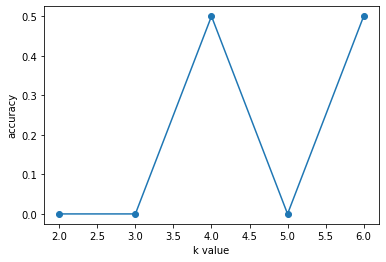

In [ ]:
#we plot the graph between the k-value(neighbor value) and acc_value
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
#replace our k-values with 5
classifier =KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("precision is:",precision_score(y_test, y_pred))
print("recall is:",recall_score(y_test, y_pred))
print("f1 score is:",f1_score(y_test, y_pred))

Accuracy is: 0.0
precision is: 0.0
recall is: 0.0
f1 score is: 0.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[0, 1],
       [1, 0]])

In [ ]:
data.describe()

,Age,Income,Online Shopper_No,Online Shopper_Yes
count,10.000000,10.000000,10.000000,10.000000
mean,43.700000,76200.000000,0.500000,0.500000
std,7.257946,13916.896206,0.527046,0.527046
min,32.000000,57600.000000,0.000000,0.000000
25%,40.500000,66000.000000,0.000000,0.000000
50%,43.000000,73200.000000,0.500000,0.500000
75%,48.000000,84900.000000,1.000000,1.000000
max,55.000000,99600.000000,1.000000,1.000000


In [ ]:
#the above table values have different ranges
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train, y_train)
y_pred = logis_model.predict(x_test)

In [ ]:
logis_model = LogisticRegression()
logis_model.fit(x_train, y_train)
y_pred = logis_model.predict(x_test)

In [ ]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("precision is:",precision_score(y_test, y_pred))
print("recall is:",recall_score(y_test, y_pred))
print("f1 score is:",f1_score(y_test, y_pred))

Accuracy is: 1.0
precision is: 1.0
recall is: 1.0
f1 score is: 1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 1]])

In [ ]:
acc_values=[]
neighbors = np.arange(1,6)
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'accuracy')

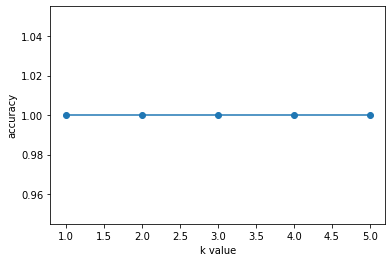

In [ ]:
#we plot the graph between the k-value(neighbor value) and acc_value
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:

classifier =KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)



In [ ]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("precision is:",precision_score(y_test, y_pred))
print("recall is:",recall_score(y_test, y_pred))
print("f1 score is:",f1_score(y_test, y_pred))

Accuracy is: 1.0
precision is: 1.0
recall is: 1.0
f1 score is: 1.0


In [ ]:

confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 1]])

In [ ]:
#SVM 
#linear classifier
from sklearn.svm import SVC

In [ ]:
svm_linear =SVC(kernel='linear')

In [ ]:
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_linear.predict(x_test)

In [ ]:
print("Accuracy using linear svm is",accuracy_score(y_test,y_pred))

Accuracy using linear svm is 1.0


In [ ]:
#to make running code fast standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred =svm_linear.predict(x_test)
print("Accuracy using linear svm is",accuracy_score(y_test,y_pred))

Accuracy using linear svm is 1.0


In [ ]:
from pandas._libs.hashtable import StringVector
#polynomial svm
svm_poly = SVC(kernel='poly',degree=5)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 1.0
